In [43]:
%load_ext autoreload
%autoreload 2
from rdkit import Chem
from rdkit.Chem import Draw
from fragmenstein import Victor, Igor
import sys
import pandas as pd
from itertools import chain
import ast
import subprocess
from rdkit.Chem.Draw import DrawingOptions
from rdkit.Chem import rdFMCS
from IPython.display import display
import xml.etree.ElementTree as ET
import os
import subprocess

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# FULL PIPELINE FOR 1 EXAMPLE MOLECULE FROM MATTEO'S FIRST ITERATION
Using only enamine bb search! 

Want to know: Does the reactant search produce different results than just a superstructure search of the base compound? Even if I can do multiple step reactions, need to see 

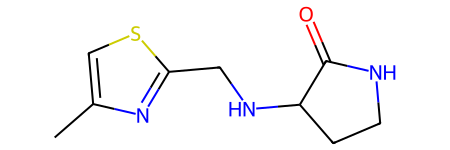

In [44]:
# The compound
mol = Chem.MolFromSmiles('C1CNC(=O)C1NCC2=NC(C)=CS2')
mol

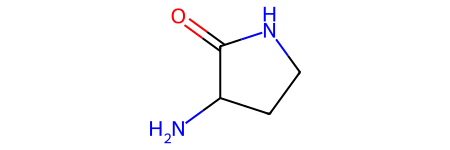

In [45]:
# The reactants (found in full_pipeline.ipynb)
reactants = [('NC1CCNC1=O', 'Cc1csc(C=O)n1')]
reactant1 = Chem.MolFromSmiles(reactants[0][0])
reactant2 = Chem.MolFromSmiles(reactants[0][1])
reactant1

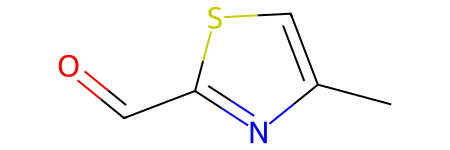

In [46]:
reactant2

In [47]:
# Make input csv for wholeMoleculePipeline.py
df = pd.DataFrame(columns=['SMILES', 'Reaction_name', 'Reactants'])
df['SMILES'] = ['C1CNC(=O)C1NCC2=NC(C)=CS2']
df['Reaction_name'] = ['Reductive_amination']
df['Reactants'] = reactants
df

,SMILES,Reaction_name,Reactants
0,C1CNC(=O)C1NCC2=NC(C)=CS2,Reductive_amination,"(NC1CCNC1=O, Cc1csc(C=O)n1)"


In [41]:
# Run wholeMoleculePipeline.py
df.to_csv('/Users/kate_fieseler/Library/CloudStorage/OneDrive-Nexus365/Project4_Compound_Coloring/EVD683C/data/reductive_amination_example/input_wholeMoleculePipeline.csv', index=False)

!python ../main_v2.py -i /Users/kate_fieseler/Library/CloudStorage/OneDrive-Nexus365/Project4_Compound_Coloring/EVD683C/data/reductive_amination_example/input_wholeMoleculePipeline.csv -r /Users/kate_fieseler/Library/CloudStorage/OneDrive-Nexus365/Project4_Compound_Coloring/EVD683C/data/reductive_amination_example/ -u

NC1CCNC1=O
7
This is the original molecule: Cc1csc(CNC2CCNC2=O)n1
This is the first reactant: NC1CCNC1=O
This is the second reactant: Cc1csc(C=O)n1
reactant1_attachmentIdxs: [(7, 0)]
reactant2_attachmentIdxs: []
This is the original reaction: Reductive_amination
This is the reactant: Cc1csc(C=O)n1
These are the atoms involved in the reaction: (5, 6, 4)
tmpdir: <TemporaryDirectory '/var/folders/sg/gb03t0zx5sz8vw2lxlghz1gr0000gn/T/tmpl3qxmk_m'>
cache_working_name: /var/folders/sg/gb03t0zx5sz8vw2lxlghz1gr0000gn/T/tmpl3qxmk_m/superstructureCache.sqlite
Number of entries in cache: 0
SEARCHING FOR  Cc1csc(C=O)n1
SEARCHING THROUGH  ['enamine_bb']
---PRE SEARCH---
lauching query for smiles number 0 (https://api.postera.ai/api/v1/superstructure/)...
Page: 1
Page: 2
Page: 3
Page: 4
^C
Traceback (most recent call last):
  File "/Users/kate_fieseler/PycharmProjects/retrievesynthesizable/nbs/../main_v2.py", line 75, in <module>
    searchAnalogues(df, args.results_dir, args.superstructure)
  File "

In [48]:
# Read in output csv
df = pd.read_csv('/Users/kate_fieseler/Library/CloudStorage/OneDrive-Nexus365/Project4_Compound_Coloring/EVD683C/data/reductive_amination_example_enaminebb/Reductive_amination_15288_analogs_nostructhresh_enaminebb.csv')
df

,reactant1_structuralScore,reactant1_mw,reactant1_smi,reactant1_metadata,reactant1_attachmentIdx,reactant2_structuralScore,reactant2_mw,reactant2_smi,reactant2_metadata,reactant2_attachmentIdx,product_smi
0,0.220119,291.380,CC(CNC(=O)c1nc2c(s1)CCC2)c1nncn1C,"[{'catalogName': 'enamine_bb', 'catalogId': 'Z...","(4, 6, 7, 5)",0.228383,156.185,CC(C)N1C(=O)CC(N)C1=O,"[{'catalogName': 'sigma', 'catalogId': '189073...","(1, 2, 5, 9)",['CC(CNC(NC1CC(=O)N(C(C)C)C1=O)c1nc2c(s1)CCC2)...
1,0.229231,346.456,CCOC(=O)c1nc(CN2CCN(Cc3ccccn3)CC2)cs1,"[{'catalogName': 'enamine_bb', 'catalogId': 'Z...","(4, 6, 7, 5)",0.228383,156.185,CC(C)N1C(=O)CC(N)C1=O,"[{'catalogName': 'sigma', 'catalogId': '189073...","(1, 2, 5, 9)",['CCOC(NC1CC(=O)N(C(C)C)C1=O)c1nc(CN2CCN(Cc3cc...
2,0.258986,198.247,COC(=O)c1nc2c(s1)CCNC2,"[{'catalogName': 'molport', 'catalogId': 'MolP...","(4, 6, 7, 5)",0.228383,156.185,CC(C)N1C(=O)CC(N)C1=O,"[{'catalogName': 'sigma', 'catalogId': '189073...","(1, 2, 5, 9)",['COC(NC1CC(=O)N(C(C)C)C1=O)c1nc2c(s1)CCNC2']
3,0.263825,262.128,COC(=O)c1nc(C2CC2)c(Br)s1,"[{'catalogName': 'enamine_bb', 'catalogId': 'E...","(4, 6, 7, 5)",0.228383,156.185,CC(C)N1C(=O)CC(N)C1=O,"[{'catalogName': 'sigma', 'catalogId': '189073...","(1, 2, 5, 9)",['COC(NC1CC(=O)N(C(C)C)C1=O)c1nc(C2CC2)c(Br)s1']
4,0.263878,243.331,O=Cc1nc2c(s1)CC(c1ccccc1)CC2,"[{'catalogName': 'enamine_bb', 'catalogId': 'E...","(4, 6, 7, 5)",0.228383,156.185,CC(C)N1C(=O)CC(N)C1=O,"[{'catalogName': 'sigma', 'catalogId': '189073...","(1, 2, 5, 9)",['CC(C)N1C(=O)CC(NCc2nc3c(s2)CC(c2ccccc2)CC3)C...
...,...,...,...,...,...,...,...,...,...,...,...
15283,0.832196,295.408,Cc1csc(C(=O)NCC2CCN2C2CCOCC2)n1,"[{'catalogName': 'enamine_bb', 'catalogId': 'Z...","(4, 6, 7, 5)",0.752950,128.175,CCN1CCC(N)C1=O,"[{'catalogName': 'pubchem', 'catalogId': '2009...","(1, 2, 5, 6)",['CCN1CCC(NC(NCC2CCN2C2CCOCC2)c2nc(C)cs2)C1=O']
15284,0.834493,213.258,CCOC(=O)C(=O)c1nc(CC)cs1,"[{'catalogName': 'enamine_bb', 'catalogId': 'E...","(4, 6, 7, 5)",0.752950,128.175,CCN1CCC(N)C1=O,"[{'catalogName': 'pubchem', 'catalogId': '2009...","(1, 2, 5, 6)","['CCOC(NC1CCN(CC)C1=O)C(=O)c1nc(CC)cs1', 'CCOC..."
15285,0.837513,359.495,CC1CCC(C(=O)N2CC3(CN(C(=O)c4nc(C5CC5)cs4)C3)C2)C1,"[{'catalogName': 'enamine_bb', 'catalogId': 'Z...","(4, 6, 7, 5)",0.752950,128.175,CCN1CCC(N)C1=O,"[{'catalogName': 'pubchem', 'catalogId': '2009...","(1, 2, 5, 6)",['CCN1CCC(NC(C2CCC(C)C2)N2CC3(CN(C(=O)c4nc(C5C...
15286,0.867709,309.318,CCOC(=O)c1nc(COC(=O)c2ccccc2F)cs1,"[{'catalogName': 'enamine_bb', 'catalogId': 'Z...","(4, 6, 7, 5)",0.752950,128.175,CCN1CCC(N)C1=O,"[{'catalogName': 'pubchem', 'catalogId': '2009...","(1, 2, 5, 6)",['CCOC(NC1CCN(CC)C1=O)c1nc(COC(=O)c2ccccc2F)cs...


In [58]:
# How many of them have the base compound as a MCS?
# Read in list of product_smi, count how many are in the list and put number in column
df['product_smi_count'] = df['product_smi'].apply(lambda x: len(ast.literal_eval(x)) if isinstance(ast.literal_eval(x), list) else 0)
df
df.to_csv('/Users/kate_fieseler/Library/CloudStorage/OneDrive-Nexus365/Project4_Compound_Coloring/EVD683C/data/reductive_amination_example_enaminebb/Reductive_amination_15288_analogs_nostructhresh_enaminebb.csv', index=False)

In [64]:
# Create column with MCS_as_base_compound with list of true false values for whether the product_smi is the base compound
# Is the MCS the base compound?
def is_mcs_same_as_mol(mol1, mol2, compare_mol):
    # Find the MCS of mol1 and mol2
    mcs_result = rdFMCS.FindMCS([mol1, mol2])

    # Create an RDKit molecule object from the MCS's SMARTS string
    mcs_mol = Chem.MolFromSmarts(mcs_result.smartsString)

    # Check if the MCS is the same as the compare_mol using a substructure match
    return compare_mol.HasSubstructMatch(mcs_mol) and mcs_mol.HasSubstructMatch(compare_mol)

def is_MCS(row, base):
    assert isinstance(base, str)
    values = []
    base = Chem.MolFromSmiles(base)
    for i in row:
        print(i)
        mol = Chem.MolFromSmiles(i)
        values.append(is_mcs_same_as_mol(base, mol, base))
    assert len(values) == len(row)
    return values

df['MCS_of_product'] = df['product_smi'].apply(lambda x: is_MCS(ast.literal_eval(x), base='C1CNC(=O)C1NCC2=NC(C)=CS2'))

CC(CNC(NC1CC(=O)N(C(C)C)C1=O)c1nc2c(s1)CCC2)c1nncn1C
CCOC(NC1CC(=O)N(C(C)C)C1=O)c1nc(CN2CCN(Cc3ccccn3)CC2)cs1
COC(NC1CC(=O)N(C(C)C)C1=O)c1nc2c(s1)CCNC2
COC(NC1CC(=O)N(C(C)C)C1=O)c1nc(C2CC2)c(Br)s1
CC(C)N1C(=O)CC(NCc2nc3c(s2)CC(c2ccccc2)CC3)C1=O
CC(C)N1C(=O)CC(NC(c2nc3c(s2)COCC3)N2CCC3=NS(=O)(=O)NC=C3C2)C1=O
CCOC(NC1CC(=O)N(C(C)C)C1=O)c1nc2c(s1)N(S(=O)(=O)c1cccc(Cl)c1)CCCC2
CCOC(NC1CC(=O)N(C(C)C)C1=O)c1nc2c(s1)N(S(=O)(=O)c1cccnc1)CCCC2
CC(C)N1C(=O)CC(NC(NCc2nnc(-c3ccncc3)[nH]2)c2nc3c(s2)CN(C)CC3)C1=O
COC(NC1CC(=O)N(C(C)C)C1=O)c1ccc2c(c1)CCN2C(=O)c1nc(C(C)C)cs1
COC(=O)c1ccc2c(c1)CCN2C(NC1CC(=O)N(C(C)C)C1=O)c1nc(C(C)C)cs1
CCOC(NC1CC(=O)N(C(C)C)C1=O)c1nc(CN2CCCN(S(=O)(=O)c3c(C)noc3C)CC2)cs1
COC(NC1CC(=O)N(C(C)C)C1=O)c1nc2c(s1)CCN(C(=O)OC(C)(C)C)C2
CC(C)N1C(=O)CC(NC(Nc2ccc(-c3nncn3C)cc2)c2nc3c(s2)CN(C)CC3)C1=O
CCOC(NC1CC(=O)N(C(C)C)C1=O)c1nc(CN2CCCC(NS(C)(=O)=O)C2)cs1
CC(C)N1C(=O)CC(NC(NCc2cccc3nsnc23)c2nc3c(s2)CN(C)CC3)C1=O
CCOC(NC1CC(=O)N(C(C)C)C1=O)c1nc(CSc2nc(O)n3ncc(C#N)c3n2)cs1
CCOC(N

In [66]:
df.to_csv('/Users/kate_fieseler/Library/CloudStorage/OneDrive-Nexus365/Project4_Compound_Coloring/EVD683C/data/reductive_amination_example_enaminebb/Reductive_amination_15288_analogs_nostructhresh_enaminebb.csv', index=False)

In [75]:
df['product_smi'] = df['product_smi'].apply(lambda x: ast.literal_eval(x))
df_exploded = df.explode('product_smi').explode('MCS_of_product')
df_exploded

,reactant1_structuralScore,reactant1_mw,reactant1_smi,reactant1_metadata,reactant1_attachmentIdx,reactant2_structuralScore,reactant2_mw,reactant2_smi,reactant2_metadata,reactant2_attachmentIdx,product_smi,product_smi_count,MCS_of_product
0,0.220119,291.380,CC(CNC(=O)c1nc2c(s1)CCC2)c1nncn1C,"[{'catalogName': 'enamine_bb', 'catalogId': 'Z...","(4, 6, 7, 5)",0.228383,156.185,CC(C)N1C(=O)CC(N)C1=O,"[{'catalogName': 'sigma', 'catalogId': '189073...","(1, 2, 5, 9)",CC(CNC(NC1CC(=O)N(C(C)C)C1=O)c1nc2c(s1)CCC2)c1...,1,True
1,0.229231,346.456,CCOC(=O)c1nc(CN2CCN(Cc3ccccn3)CC2)cs1,"[{'catalogName': 'enamine_bb', 'catalogId': 'Z...","(4, 6, 7, 5)",0.228383,156.185,CC(C)N1C(=O)CC(N)C1=O,"[{'catalogName': 'sigma', 'catalogId': '189073...","(1, 2, 5, 9)",CCOC(NC1CC(=O)N(C(C)C)C1=O)c1nc(CN2CCN(Cc3cccc...,1,True
2,0.258986,198.247,COC(=O)c1nc2c(s1)CCNC2,"[{'catalogName': 'molport', 'catalogId': 'MolP...","(4, 6, 7, 5)",0.228383,156.185,CC(C)N1C(=O)CC(N)C1=O,"[{'catalogName': 'sigma', 'catalogId': '189073...","(1, 2, 5, 9)",COC(NC1CC(=O)N(C(C)C)C1=O)c1nc2c(s1)CCNC2,1,True
3,0.263825,262.128,COC(=O)c1nc(C2CC2)c(Br)s1,"[{'catalogName': 'enamine_bb', 'catalogId': 'E...","(4, 6, 7, 5)",0.228383,156.185,CC(C)N1C(=O)CC(N)C1=O,"[{'catalogName': 'sigma', 'catalogId': '189073...","(1, 2, 5, 9)",COC(NC1CC(=O)N(C(C)C)C1=O)c1nc(C2CC2)c(Br)s1,1,True
4,0.263878,243.331,O=Cc1nc2c(s1)CC(c1ccccc1)CC2,"[{'catalogName': 'enamine_bb', 'catalogId': 'E...","(4, 6, 7, 5)",0.228383,156.185,CC(C)N1C(=O)CC(N)C1=O,"[{'catalogName': 'sigma', 'catalogId': '189073...","(1, 2, 5, 9)",CC(C)N1C(=O)CC(NCc2nc3c(s2)CC(c2ccccc2)CC3)C1=O,1,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15286,0.867709,309.318,CCOC(=O)c1nc(COC(=O)c2ccccc2F)cs1,"[{'catalogName': 'enamine_bb', 'catalogId': 'Z...","(4, 6, 7, 5)",0.752950,128.175,CCN1CCC(N)C1=O,"[{'catalogName': 'pubchem', 'catalogId': '2009...","(1, 2, 5, 6)",CCOC(NC1CCN(CC)C1=O)c1nc(COC(=O)c2ccccc2F)cs1,2,True
15286,0.867709,309.318,CCOC(=O)c1nc(COC(=O)c2ccccc2F)cs1,"[{'catalogName': 'enamine_bb', 'catalogId': 'Z...","(4, 6, 7, 5)",0.752950,128.175,CCN1CCC(N)C1=O,"[{'catalogName': 'pubchem', 'catalogId': '2009...","(1, 2, 5, 6)",CCOC(NC1CCN(CC)C1=O)c1nc(COC(=O)c2ccccc2F)cs1,2,False
15286,0.867709,309.318,CCOC(=O)c1nc(COC(=O)c2ccccc2F)cs1,"[{'catalogName': 'enamine_bb', 'catalogId': 'Z...","(4, 6, 7, 5)",0.752950,128.175,CCN1CCC(N)C1=O,"[{'catalogName': 'pubchem', 'catalogId': '2009...","(1, 2, 5, 6)",CCOC(=O)c1nc(COC(NC2CCN(CC)C2=O)c2ccccc2F)cs1,2,True
15286,0.867709,309.318,CCOC(=O)c1nc(COC(=O)c2ccccc2F)cs1,"[{'catalogName': 'enamine_bb', 'catalogId': 'Z...","(4, 6, 7, 5)",0.752950,128.175,CCN1CCC(N)C1=O,"[{'catalogName': 'pubchem', 'catalogId': '2009...","(1, 2, 5, 6)",CCOC(=O)c1nc(COC(NC2CCN(CC)C2=O)c2ccccc2F)cs1,2,False


In [74]:
df_exploded['product_smi'] = df['product_smi'].apply(lambda x: ast.literal_eval(x))
df_exploded3 = df_exploded.explode('product_smi')
# Sort the dataframe by 'smiles' and reset index
df_exploded3 = df_exploded3.sort_values(by='product_smi').reset_index(drop=True)

# Assuming repeated 'smiles' values are always in pairs, 
# the first one gets the False value and the second one gets the True value
df_exploded3['MCS_of_product'] = df_exploded3.groupby('product_smi').cumcount() % 2

# Convert the 0 and 1 values back to boolean
df_exploded3['MCS_of_product'] = df_exploded3['MCS_of_product'].astype(bool)

df_exploded3

,reactant1_structuralScore,reactant1_mw,reactant1_smi,reactant1_metadata,reactant1_attachmentIdx,reactant2_structuralScore,reactant2_mw,reactant2_smi,reactant2_metadata,reactant2_attachmentIdx,product_smi,product_smi_count,MCS_of_product
0,0.664364,347.444,C#CCCC1(CCNC(=O)c2nc(CN3CCOCC3)cs2)N=N1,"[{'catalogName': 'enamine_bb', 'catalogId': 'Z...","(4, 6, 7, 5)",0.477255,142.202,CC(C)C1(N)CCNC1=O,"[{'catalogName': 'enamine_bb', 'catalogId': 'E...","(1, 2, 5, 6)",C#CCCC1(CCNC(NC2(C(C)C)CCNC2=O)c2nc(CN3CCOCC3)...,2,False
1,0.664364,347.444,C#CCCC1(CCNC(=O)c2nc(CN3CCOCC3)cs2)N=N1,"[{'catalogName': 'enamine_bb', 'catalogId': 'Z...","(4, 6, 7, 5)",0.477255,142.202,CC(C)C1(N)CCNC1=O,"[{'catalogName': 'enamine_bb', 'catalogId': 'E...","(1, 2, 5, 6)",C#CCCC1(CCNC(NC2(C(C)C)CCNC2=O)c2nc(CN3CCOCC3)...,2,True
2,0.309088,317.418,C#CCCC1(CCNC(=O)c2nc3c(s2)CN(C)CC3)N=N1,"[{'catalogName': 'enamine_bb', 'catalogId': 'Z...","(4, 6, 7, 5)",0.477255,142.202,CC(C)C1(N)CCNC1=O,"[{'catalogName': 'enamine_bb', 'catalogId': 'E...","(1, 2, 5, 6)",C#CCCC1(CCNC(NC2(C(C)C)CCNC2=O)c2nc3c(s2)CN(C)...,2,False
3,0.309088,317.418,C#CCCC1(CCNC(=O)c2nc3c(s2)CN(C)CC3)N=N1,"[{'catalogName': 'enamine_bb', 'catalogId': 'Z...","(4, 6, 7, 5)",0.477255,142.202,CC(C)C1(N)CCNC1=O,"[{'catalogName': 'enamine_bb', 'catalogId': 'E...","(1, 2, 5, 6)",C#CCCC1(CCNC(NC2(C(C)C)CCNC2=O)c2nc3c(s2)CN(C)...,2,True
4,0.664364,347.444,C#CCCC1(CCNC(=O)c2nc(CN3CCOCC3)cs2)N=N1,"[{'catalogName': 'enamine_bb', 'catalogId': 'Z...","(4, 6, 7, 5)",0.410878,114.148,CC1(N)CCNC1=O,"[{'catalogName': 'enamine_bb', 'catalogId': 'E...","(1, 2, 5, 6)",C#CCCC1(CCNC(NC2(C)CCNC2=O)c2nc(CN3CCOCC3)cs2)...,2,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
72217,0.832196,295.408,Cc1csc(C(=O)NCC2CCN2C2CCOCC2)n1,"[{'catalogName': 'enamine_bb', 'catalogId': 'Z...","(4, 6, 7, 5)",0.393380,247.136,C=C(Br)CN(C)C1CCN(C)C1=O,"[{'catalogName': 'enamine_bb', 'catalogId': 'Z...","(1, 2, 5, 6)",NaN,0,True
72218,0.834493,213.258,CCOC(=O)C(=O)c1nc(CC)cs1,"[{'catalogName': 'enamine_bb', 'catalogId': 'E...","(4, 6, 7, 5)",0.393380,247.136,C=C(Br)CN(C)C1CCN(C)C1=O,"[{'catalogName': 'enamine_bb', 'catalogId': 'Z...","(1, 2, 5, 6)",NaN,0,True
72219,0.837513,359.495,CC1CCC(C(=O)N2CC3(CN(C(=O)c4nc(C5CC5)cs4)C3)C2)C1,"[{'catalogName': 'enamine_bb', 'catalogId': 'Z...","(4, 6, 7, 5)",0.393380,247.136,C=C(Br)CN(C)C1CCN(C)C1=O,"[{'catalogName': 'enamine_bb', 'catalogId': 'Z...","(1, 2, 5, 6)",NaN,0,True
72220,0.867709,309.318,CCOC(=O)c1nc(COC(=O)c2ccccc2F)cs1,"[{'catalogName': 'enamine_bb', 'catalogId': 'Z...","(4, 6, 7, 5)",0.393380,247.136,C=C(Br)CN(C)C1CCN(C)C1=O,"[{'catalogName': 'enamine_bb', 'catalogId': 'Z...","(1, 2, 5, 6)",NaN,0,True


In [73]:
type(df['product_smi'][0])

str

In [77]:
# Count the number of atoms difference between the base compound and the product_smi
# Get number of atoms difference between MCS and elaborated. Not including hydrogens.
def atom_num_difference(base, e_mol):
    mcs = rdFMCS.FindMCS([base, e_mol])
    mcs_mol = Chem.MolFromSmarts(mcs.smartsString)
    mcs_atoms = mcs_mol.GetNumAtoms()
    e_mol_atoms = e_mol.GetNumAtoms()
    difference = e_mol_atoms - mcs_atoms
    return difference

# Add column to csv with TRUE or FALSE if MCS is the base compound and number of atoms difference between MCS and elaborated. Not including hydrogens.
base = Chem.MolFromSmiles('Cc1csc(CNC2CCNC2=O)n1')
df['MCS_is_base'] = None
df['MCS_atoms_difference'] = None
for i, row in df.iterrows():
    if isinstance(row['product_smi'], str):
        elaborated = ast.literal_eval(row['product_smi'])
    else:
        elaborated = row['product_smi']
    if not elaborated:
        continue
    if type(elaborated) is list:
        elaborated = elaborated[0]
    e_mol = Chem.MolFromSmiles(elaborated)
    df.iloc[i, df.columns.get_loc('MCS_is_base')] = is_mcs_same_as_mol(base, e_mol, base)
    df.iloc[i, df.columns.get_loc('MCS_atoms_difference')] = atom_num_difference(base, e_mol)
df

,reactant1_structuralScore,reactant1_mw,reactant1_smi,reactant1_metadata,reactant1_attachmentIdx,reactant2_structuralScore,reactant2_mw,reactant2_smi,reactant2_metadata,reactant2_attachmentIdx,product_smi,product_smi_count,MCS_of_product,MCS_is_base,MCS_atoms_difference
0,0.220119,291.380,CC(CNC(=O)c1nc2c(s1)CCC2)c1nncn1C,"[{'catalogName': 'enamine_bb', 'catalogId': 'Z...","(4, 6, 7, 5)",0.228383,156.185,CC(C)N1C(=O)CC(N)C1=O,"[{'catalogName': 'sigma', 'catalogId': '189073...","(1, 2, 5, 9)",[CC(CNC(NC1CC(=O)N(C(C)C)C1=O)c1nc2c(s1)CCC2)c...,1,[True],True,16
1,0.229231,346.456,CCOC(=O)c1nc(CN2CCN(Cc3ccccn3)CC2)cs1,"[{'catalogName': 'enamine_bb', 'catalogId': 'Z...","(4, 6, 7, 5)",0.228383,156.185,CC(C)N1C(=O)CC(N)C1=O,"[{'catalogName': 'sigma', 'catalogId': '189073...","(1, 2, 5, 9)",[CCOC(NC1CC(=O)N(C(C)C)C1=O)c1nc(CN2CCN(Cc3ccc...,1,[True],True,20
2,0.258986,198.247,COC(=O)c1nc2c(s1)CCNC2,"[{'catalogName': 'molport', 'catalogId': 'MolP...","(4, 6, 7, 5)",0.228383,156.185,CC(C)N1C(=O)CC(N)C1=O,"[{'catalogName': 'sigma', 'catalogId': '189073...","(1, 2, 5, 9)",[COC(NC1CC(=O)N(C(C)C)C1=O)c1nc2c(s1)CCNC2],1,[True],True,9
3,0.263825,262.128,COC(=O)c1nc(C2CC2)c(Br)s1,"[{'catalogName': 'enamine_bb', 'catalogId': 'E...","(4, 6, 7, 5)",0.228383,156.185,CC(C)N1C(=O)CC(N)C1=O,"[{'catalogName': 'sigma', 'catalogId': '189073...","(1, 2, 5, 9)",[COC(NC1CC(=O)N(C(C)C)C1=O)c1nc(C2CC2)c(Br)s1],1,[True],True,9
4,0.263878,243.331,O=Cc1nc2c(s1)CC(c1ccccc1)CC2,"[{'catalogName': 'enamine_bb', 'catalogId': 'E...","(4, 6, 7, 5)",0.228383,156.185,CC(C)N1C(=O)CC(N)C1=O,"[{'catalogName': 'sigma', 'catalogId': '189073...","(1, 2, 5, 9)",[CC(C)N1C(=O)CC(NCc2nc3c(s2)CC(c2ccccc2)CC3)C1=O],1,[True],True,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15283,0.832196,295.408,Cc1csc(C(=O)NCC2CCN2C2CCOCC2)n1,"[{'catalogName': 'enamine_bb', 'catalogId': 'Z...","(4, 6, 7, 5)",0.752950,128.175,CCN1CCC(N)C1=O,"[{'catalogName': 'pubchem', 'catalogId': '2009...","(1, 2, 5, 6)",[CCN1CCC(NC(NCC2CCN2C2CCOCC2)c2nc(C)cs2)C1=O],1,[True],True,14
15284,0.834493,213.258,CCOC(=O)C(=O)c1nc(CC)cs1,"[{'catalogName': 'enamine_bb', 'catalogId': 'E...","(4, 6, 7, 5)",0.752950,128.175,CCN1CCC(N)C1=O,"[{'catalogName': 'pubchem', 'catalogId': '2009...","(1, 2, 5, 6)","[CCOC(NC1CCN(CC)C1=O)C(=O)c1nc(CC)cs1, CCOC(=O...",3,"[False, True, True]",False,11
15285,0.837513,359.495,CC1CCC(C(=O)N2CC3(CN(C(=O)c4nc(C5CC5)cs4)C3)C2)C1,"[{'catalogName': 'enamine_bb', 'catalogId': 'Z...","(4, 6, 7, 5)",0.752950,128.175,CCN1CCC(N)C1=O,"[{'catalogName': 'pubchem', 'catalogId': '2009...","(1, 2, 5, 6)",[CCN1CCC(NC(C2CCC(C)C2)N2CC3(CN(C(=O)c4nc(C5CC...,2,"[False, True]",False,20
15286,0.867709,309.318,CCOC(=O)c1nc(COC(=O)c2ccccc2F)cs1,"[{'catalogName': 'enamine_bb', 'catalogId': 'Z...","(4, 6, 7, 5)",0.752950,128.175,CCN1CCC(N)C1=O,"[{'catalogName': 'pubchem', 'catalogId': '2009...","(1, 2, 5, 6)",[CCOC(NC1CCN(CC)C1=O)c1nc(COC(=O)c2ccccc2F)cs1...,2,"[True, False]",True,15


In [79]:
df.to_csv('/Users/kate_fieseler/Library/CloudStorage/OneDrive-Nexus365/Project4_Compound_Coloring/EVD683C/data/reductive_amination_example_enaminebb/Reductive_amination_15288_analogs_nostructhresh_enaminebb_MCS.csv', index=False)

In [80]:
# TODO: Need to unpack product smiles list to look at every product
df1 = df.copy()
# Filter df to only include rows where MCS is the base compound
df1 = df1[df1['MCS_is_base'] == True]
df1.shape

(9894, 15)

In [81]:
# How many compounds have 5 or less atoms difference?
df1[df1['MCS_atoms_difference'] <= 5].shape

(306, 15)

In [96]:
# How does mw compare with number of atoms difference?
# Add column with total structural score
df1['product_mw'] = None
def compute_mw(row):
    mol = Chem.MolFromSmiles(row['product_smi'][0])
    return Chem.Descriptors.ExactMolWt(mol)
df1['product_mw'] = (df1.apply(compute_mw, axis=1))
df1.drop(columns=['total_structuralScore'], inplace=True)


In [130]:
filtered_df = df1[df1['MCS_atoms_difference'] <= 5]
filtered_df

,reactant1_structuralScore,reactant1_mw,reactant1_smi,reactant1_metadata,reactant1_attachmentIdx,reactant2_structuralScore,reactant2_mw,reactant2_smi,reactant2_metadata,reactant2_attachmentIdx,product_smi,product_smi_count,MCS_of_product,MCS_is_base,MCS_atoms_difference,product_mw
90,0.336054,206.064,Cc1nc(C=O)sc1Br,"[{'catalogName': 'pubchem', 'catalogId': '5658...","(4, 6, 7, 5)",0.228383,156.185,CC(C)N1C(=O)CC(N)C1=O,"[{'catalogName': 'sigma', 'catalogId': '189073...","(1, 2, 5, 9)",[Cc1nc(CNC2CC(=O)N(C(C)C)C2=O)sc1Br],1,[True],True,5,345.014660
106,0.344663,141.195,Cc1nc(C=O)sc1C,"[{'catalogName': 'pubchem', 'catalogId': '1459...","(4, 6, 7, 5)",0.228383,156.185,CC(C)N1C(=O)CC(N)C1=O,"[{'catalogName': 'sigma', 'catalogId': '189073...","(1, 2, 5, 9)",[Cc1nc(CNC2CC(=O)N(C(C)C)C2=O)sc1C],1,[True],True,5,281.119798
196,0.498799,143.167,O=Cc1nc(CO)cs1,"[{'catalogName': 'emolecules', 'catalogId': '1...","(4, 6, 7, 5)",0.228383,156.185,CC(C)N1C(=O)CC(N)C1=O,"[{'catalogName': 'sigma', 'catalogId': '189073...","(1, 2, 5, 9)",[CC(C)N1C(=O)CC(NCc2nc(CO)cs2)C1=O],1,[True],True,5,283.099062
306,0.818864,141.195,CC(=O)c1nc(C)cs1,"[{'catalogName': 'pubchem', 'catalogId': '5324...","(4, 6, 7, 5)",0.228383,156.185,CC(C)N1C(=O)CC(N)C1=O,"[{'catalogName': 'sigma', 'catalogId': '189073...","(1, 2, 5, 9)","[Cc1csc(C(C)NC2CC(=O)N(C(C)C)C2=O)n1, Cc1csc(C...",2,"[True, True]",True,5,281.119798
1650,0.336054,206.064,Cc1nc(C=O)sc1Br,"[{'catalogName': 'pubchem', 'catalogId': '5658...","(4, 6, 7, 5)",0.277653,154.213,C=CCN1CCC(NC)C1=O,"[{'catalogName': 'sigma', 'catalogId': '247779...","(1, 2, 5, 6)",[C=CCN1CCC(N(C)Cc2nc(C)c(Br)s2)C1=O],1,[True],True,5,343.035395
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15200,0.581054,171.221,CC(C)c1csc(C(=O)O)n1,"[{'catalogName': 'molport', 'catalogId': 'MolP...","(4, 6, 7, 5)",0.752950,128.175,CCN1CCC(N)C1=O,"[{'catalogName': 'pubchem', 'catalogId': '2009...","(1, 2, 5, 6)",[CCN1CCC(NC(O)c2nc(C(C)C)cs2)C1=O],1,[True],True,5,283.135448
15208,0.595453,222.063,Cc1nc(C(=O)O)sc1Br,"[{'catalogName': 'pubchem', 'catalogId': '2055...","(4, 6, 7, 5)",0.752950,128.175,CCN1CCC(N)C1=O,"[{'catalogName': 'pubchem', 'catalogId': '2009...","(1, 2, 5, 6)",[CCN1CCC(NC(O)c2nc(C)c(Br)s2)C1=O],1,[True],True,4,333.014660
15235,0.668075,169.205,O=Cc1nc2c(s1)COCC2,"[{'catalogName': 'molport', 'catalogId': 'MolP...","(4, 6, 7, 5)",0.752950,128.175,CCN1CCC(N)C1=O,"[{'catalogName': 'pubchem', 'catalogId': '2009...","(1, 2, 5, 6)",[CCN1CCC(NCc2nc3c(s2)COCC3)C1=O],1,[True],True,5,281.119798
15249,0.696711,157.194,CCc1csc(C(=O)O)n1,"[{'catalogName': 'pubchem', 'catalogId': '3923...","(4, 6, 7, 5)",0.752950,128.175,CCN1CCC(N)C1=O,"[{'catalogName': 'pubchem', 'catalogId': '2009...","(1, 2, 5, 6)",[CCc1csc(C(O)NC2CCN(CC)C2=O)n1],1,[True],True,4,269.119798


([<matplotlib.axis.XTick at 0x2abe606d0>,
 [Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10')])

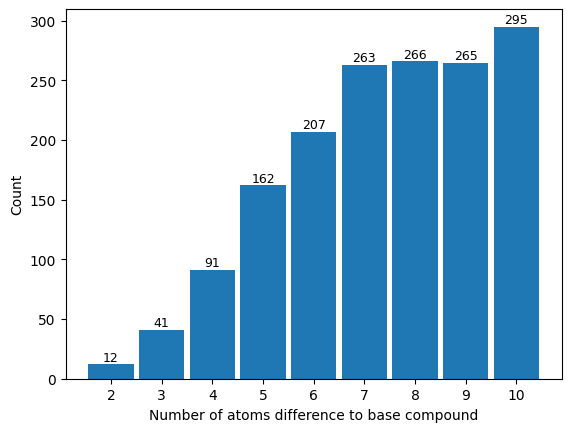

In [122]:
import matplotlib.pyplot as plt
import numpy as np

# Calculate the unique values and their counts
unique_values, counts = np.unique(df1['MCS_atoms_difference'], return_counts=True)
counts = counts.tolist()
unique_values = unique_values.tolist()

# Plot bar graph
bars = plt.bar(unique_values[:9], counts[:9], width=0.9)
plt.xlabel('Number of atoms difference to base compound')
plt.ylabel('Count')

# Annotate bars with their counts
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.5, int(yval), ha='center', va='bottom', fontsize=9)

plt.xticks(unique_values[:9], rotation=0)  # Ensures we only have integer ticks on the x-axis

In [99]:
type(df1['MCS_atoms_difference'][0])

int

In [131]:
type(df1['product_mw'][0])
df_1_atom = df1[df1['MCS_atoms_difference'] == 1]
df_1_atom

,reactant1_structuralScore,reactant1_mw,reactant1_smi,reactant1_metadata,reactant1_attachmentIdx,reactant2_structuralScore,reactant2_mw,reactant2_smi,reactant2_metadata,reactant2_attachmentIdx,product_smi,product_smi_count,MCS_of_product,MCS_is_base,MCS_atoms_difference,product_mw


Cc1nc(CNC2CCN(O)C2=O)sc1Br
Cc1nc(CNC2CCN(O)C2=O)sc1C
O=C1C(NCc2nc(CO)cs2)CCN1O
Cc1csc(C(C)NC2CCN(O)C2=O)n1
Cc1nc(CNC2CC(=O)NC2=O)sc1Br
Cc1nc(CNC2CC(=O)NC2=O)sc1C
O=C1CC(NCc2nc(CO)cs2)C(=O)N1
Cc1csc(C(C)NC2CC(=O)NC2=O)n1
Cc1nc(CNC2(C)CCNC2=O)sc1Br
Cc1nc(CNC2(C)CCNC2=O)sc1C
CC1(NCc2nc(CO)cs2)CCNC1=O
Cc1csc(C(C)NC2(C)CCNC2=O)n1


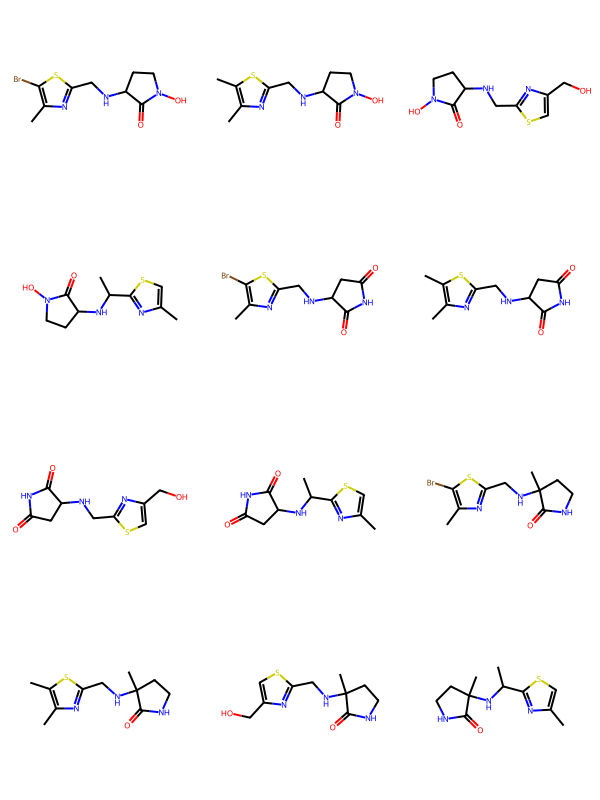

In [132]:
# Let's look at structures that have an MCS atom difference of 2
def get_mols(row):
    smiles = row['product_smi'][0]
    print(smiles)
    mol = Chem.MolFromSmiles(smiles)
    return mol
df_1_atom = df1[df1['MCS_atoms_difference'] == 2]
mols = df_1_atom.apply(get_mols, axis=1)
Draw.MolsToGridImage(mols)

In [141]:
df_1_atom = df1[df1['MCS_atoms_difference'] == 2]
df_1_atom['product_smi']

2274                         [Cc1nc(CNC2CCN(O)C2=O)sc1Br]
2290                          [Cc1nc(CNC2CCN(O)C2=O)sc1C]
2380                          [O=C1C(NCc2nc(CO)cs2)CCN1O]
2490    [Cc1csc(C(C)NC2CCN(O)C2=O)n1, Cc1csc(C(C)NC2CC...
6642    [Cc1nc(CNC2CC(=O)NC2=O)sc1Br, Cc1nc(CN2C(=O)CC...
6658    [Cc1nc(CNC2CC(=O)NC2=O)sc1C, Cc1nc(CN2C(=O)CC(...
6748    [O=C1CC(NCc2nc(CO)cs2)C(=O)N1, NC1CC(=O)N(Cc2n...
6858    [Cc1csc(C(C)NC2CC(=O)NC2=O)n1, Cc1csc(C(C)N2C(...
9762    [Cc1nc(CNC2(C)CCNC2=O)sc1Br, Cc1nc(CN2CCC(C)(N...
9778    [Cc1nc(CNC2(C)CCNC2=O)sc1C, Cc1nc(CN2CCC(C)(N)...
9868    [CC1(NCc2nc(CO)cs2)CCNC1=O, CC1(N)CCN(Cc2nc(CO...
9978    [Cc1csc(C(C)NC2(C)CCNC2=O)n1, Cc1csc(C(C)N2CCC...
Name: product_smi, dtype: object